In [31]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv(Path("C:/Users/ritvi/Downloads/Merged Daily Data.csv"), index_col="Period", infer_datetime_format=True, parse_dates=True)

## Variables Used

In this case we used the variables of 'Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value', 'Crude Oil (NYMEX:^CL) - Day Close Price', 'S&P 500 (^SPX) - Index Value', 'S&P/TSX Composite Index (^GSPTSE) - Index Value'. These variables are known to have a big impact on exchange rates as per our research. Especially the likes of Crude oil. S&P 500 index represents the United States stock index and S&P/TSX Composite represents the Canadian stock index. Daily prime reates were also used in case as they are a good measure for inflation and other factors.

<b> For daily factors we also have a lot more variables so in hypothesis, the machine learning algorithms should perform a lot better. </b>

In [3]:
data.head()

,Unnamed: 0,Canadian Dollar ($CADUSD) - Rate Value,Canada Prime Rate (%PRC1) - Rate Value,United States Prime Rate - Rate Value,Crude Oil (NYMEX:^CL) - Day Close Price,S&P 500 (^SPX) - Index Value,S&P/TSX Composite Index (^GSPTSE) - Index Value
Period,,,,,,,
1983-03-30,0,1.23,11.5,10.5,29.40,153.39,2141.95
1983-03-31,1,1.23,11.5,10.5,29.29,152.96,2156.06
1983-04-04,2,1.24,11.5,10.5,29.44,153.02,2156.05
1983-04-05,3,1.24,11.5,10.5,29.71,151.89,2154.71
1983-04-06,4,1.23,11.5,10.5,29.90,151.04,2151.10


In [4]:
X = data[['Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value', 'Crude Oil (NYMEX:^CL) - Day Close Price', 'S&P 500 (^SPX) - Index Value', 'S&P/TSX Composite Index (^GSPTSE) - Index Value']]
y = data['Canadian Dollar ($CADUSD) - Rate Value']

## Utilizing Random Forest

Random forest is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions. It is a type of bagging algorithm where multiple decision trees are trained on random subsets of the training data, and their predictions are combined to make a final prediction.In a random forest, each tree is constructed using a random subset of the features, which helps to reduce the correlation between the trees and improve their accuracy. The algorithm also uses a technique called bootstrapping, where each tree is trained on a random sample of the training data with replacement.

Random forest is a versatile algorithm that can be used for both classification and regression tasks, and is particularly well-suited to handle high-dimensional data with many features. It is also less prone to overfitting than individual decision trees, and can handle missing data and outliers effectively. Overall, random forest is a powerful and widely-used machine learning algorithm with a strong track record of success in various applications.

In [5]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# train random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=980)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=980)

In [7]:
# make predictions
y_pred = rf.predict(X_test)

In [8]:
# calculate R-squared
r2 = r2_score(y_test, y_pred)

In [9]:
# determine recommendation based on predicted value
last_price = data.iloc[-1]['Canadian Dollar ($CADUSD) - Rate Value']
predicted_price = rf.predict(X.iloc[[-1]][['Canada Prime Rate (%PRC1) - Rate Value', 'United States Prime Rate - Rate Value', 'Crude Oil (NYMEX:^CL) - Day Close Price', 'S&P 500 (^SPX) - Index Value', 'S&P/TSX Composite Index (^GSPTSE) - Index Value']])[0]

if predicted_price > last_price:
    recommendation = 'BUY'
else:
    recommendation = 'SELL'

In [10]:
# print recommendation and R-squared
print('Recommendation:', recommendation)
print('R-squared:', r2)

Recommendation: SELL
R-squared: 0.9944041772115847


## <b> Utilizing Gradient Boosting </b>

Gradient Boosting is a machine learning algorithm that is used for both regression and classification problems. It works by iteratively adding decision trees to an ensemble, where each new tree tries to correct the mistakes of the previous trees. Gradient Boosting starts with a single decision tree and evaluates its performance on the training set. The next tree is then built to correct the errors of the first tree. This process continues until a specified number of trees have been built, or until a predefined threshold of performance is achieved.In Gradient Boosting, the decision trees are typically shallow, which means they have few levels and only a few decision rules. This helps to prevent overfitting of the data, and the shallow trees are combined to form a more powerful model.

One of the key features of Gradient Boosting is that it uses a gradient descent algorithm to minimize the loss function. This allows the algorithm to converge quickly and to find the best parameters for the model.Gradient Boosting is a popular algorithm in machine learning due to its high accuracy, ability to handle large datasets, and flexibility in handling different types of data.

In [11]:
# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=980)

In [12]:
# Fit the model to the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=980)

In [13]:
# Predict the exchange rate for the testing data
y_pred = gbr.predict(X_test)

In [14]:
# Evaluate the performance of the model using Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.0007471914459322789
R^2 Score:  0.9674683328205349


In [15]:
# Predict the exchange rate for the next 3 months
next_3_months = X[-3:]
future_predictions = gbr.predict(next_3_months)
print("Predictions for next 3 months: ", future_predictions)

Predictions for next 3 months:  [1.34754042 1.34754042 1.34906837]


## <b> Utilizing Support Vector Machines </b>

Support Vector Machines (SVM) is a popular machine learning algorithm used for both classification and regression tasks. SVM seeks to find a hyperplane in the input space that separates the data into different classes or predicts the target variable values. The main objective of SVM is to maximize the margin between the classes or to minimize the classification error. SVM works by mapping the input data to a high-dimensional feature space, where a decision boundary is determined to separate the data into classes. SVM has different kernel functions such as linear, polynomial, and radial basis function (RBF) kernel, which can be used to map the data into the feature space. The SVM algorithm finds the optimal hyperplane that maximizes the distance between the closest points of each class. These points are called support vectors. The distance between the hyperplane and the support vectors is called the margin. A larger margin indicates better generalization performance of the model.

In addition to classification tasks, SVM can also be used for regression tasks by modifying the objective function to minimize the deviation of the predicted target variable values from the actual values. SVM regression is based on finding a hyperplane that maximizes the margin of the support vectors, while also ensuring that the predicted target values lie within a certain distance of the hyperplane. Overall, SVM is a powerful machine learning algorithm that can handle both linear and non-linear problems, and can be used for both classification and regression tasks. SVM has been widely used in various applications, such as image classification, text classification, and financial prediction.

In [ ]:
# Train the SVM model
svm = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R^2: ', r2)

MSE:  0.024065206139491566
RMSE:  0.15512964300703966
R^2:  0.03149596726229553


## <b> K-Nearest Neighbours </b>

K-Nearest Neighbors (KNN) is a machine learning algorithm used for both classification and regression tasks. KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution, which makes it useful in scenarios where the data is highly irregular and hard to model using other algorithms.The algorithm works by finding the K number of training samples in the feature space that are closest to the new input data point, and then predicts the output value based on the average or majority of the labels of those K nearest samples. The distance between two data points can be measured using various distance metrics such as Euclidean, Manhattan, or Hamming distance.

One of the advantages of the KNN algorithm is that it's simple and easy to understand and implement. It also performs well on small to medium-sized datasets with low dimensions. However, it can be computationally expensive and slow on large datasets with high dimensions, and it may also suffer from the curse of dimensionality. Choosing the optimal value of K is also crucial, as too small or too large K values can affect the accuracy and generalization of the model.

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=980)

In [24]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)

MSE: 0.00010322021660649816
R^2: 0.9954237720194272


## <b> Working all the models together to evaluate the best model </b>

MAE, MSE, RMSE, and R-squared are common evaluation metrics used in machine learning regression problems.

MAE (Mean Absolute Error) is the average absolute difference between the predicted values and the actual values. It measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the MAE value, the better the model's performance.

MSE (Mean Squared Error) is the average of the squared differences between the predicted values and the actual values. It measures the average squared difference between the predicted and actual values, and it penalizes larger errors more heavily than smaller ones. The lower the MSE value, the better the model's performance.

RMSE (Root Mean Squared Error) is the square root of the MSE. It measures the standard deviation of the residuals (prediction errors). The lower the RMSE value, the better the model's performance.

R-squared (Coefficient of Determination) is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. A value of 1 means that the model explains all the variability of the response data around its mean. A value of 0 means that the model explains none of the variability.

In general, it is better to have lower values for MAE, MSE, and RMSE, as it indicates a smaller prediction error. For R-squared, a higher value indicates a better fit of the model to the data, but it's important to note that a high R-squared does not necessarily mean that the model is a good predictor, as it may be overfitting the data.

In [32]:
# Initialize models
rf_model = RandomForestRegressor(random_state=980)
gb_model = GradientBoostingRegressor(random_state=980)
nn_model = MLPRegressor(random_state=980)
svm_model = SVR()
knn_model = KNeighborsRegressor()
lr_model = LinearRegression()

models = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), 
          ('Neural Networks', nn_model), ('Support Vector Machines', svm_model), 
          ('K-Nearest Neighbors', knn_model), ('Linear Regression', lr_model)]

In [33]:
# Train and evaluate models
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print('\n')

Random Forest
MAE: 0.007037906137184072
MSE: 0.00011110389375966858
RMSE: 0.010540583179296513
R-squared: 0.9950742522725768


Gradient Boosting
MAE: 0.019907044728137844
MSE: 0.000728597822878512
RMSE: 0.026992551248048266
R-squared: 0.9676979001472935


Neural Networks
MAE: 0.03447360305872935
MSE: 0.002232731654472255
RMSE: 0.047251789960511076
R-squared: 0.9010127143090749


Support Vector Machines
MAE: 0.050639334977160076
MSE: 0.003381243952196379
RMSE: 0.0581484647449645
R-squared: 0.850093870252452


K-Nearest Neighbors
MAE: 0.007007735946364107
MSE: 0.00010322021660649816
RMSE: 0.01015973506576319
R-squared: 0.9954237720194272


Linear Regression
MAE: 0.06608895304421596
MSE: 0.007077195587033151
RMSE: 0.08412606960409567
R-squared: 0.6862352983346796




## Evaluation

From the above models, R-squared is the highest with Random Forest, so it is best to Utilize Random Forest. On top of that, we can also see that Linear Regression had the worse results as it is not used well for Financial Applications in comparison to other Machine Learning methods. A close second was KNN or K-Nearest Neighbors with a very R-Squared along with similar MAE, MSE, RMSE to Random Forest.

In [34]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

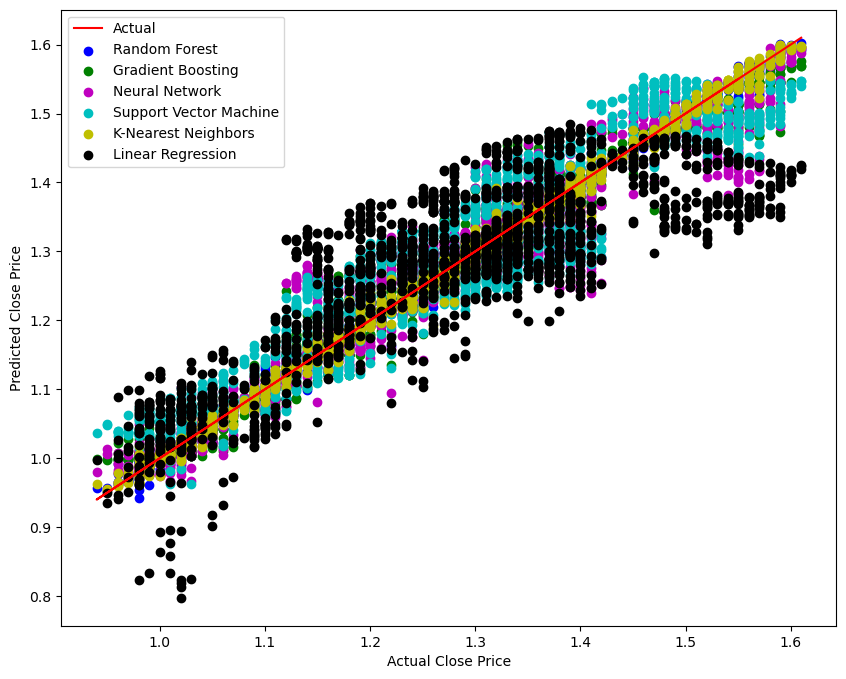

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for each model
plt.figure(figsize=(10, 8))
plt.plot(y_test, y_test, 'r-', label='Actual')
plt.scatter(y_test, y_pred_rf, color='b', label='Random Forest')
plt.scatter(y_test, y_pred_gb, color='g', label='Gradient Boosting')
plt.scatter(y_test, y_pred_nn, color='m', label='Neural Network')
plt.scatter(y_test, y_pred_svm, color='c', label='Support Vector Machine')
plt.scatter(y_test, y_pred_knn, color='y', label='K-Nearest Neighbors')
plt.scatter(y_test, y_pred_lr, color='k', label='Linear Regression')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()